# 1. Collecting Datasets

## 1.1. Mengambil data dari chembl websource

In [ ]:
!pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

## 1.2. Mengambil dataset dengan target pref_name Cytochrome P450 19A1 atau Aromatase

In [ ]:
target = new_client.target
target_query = target.search('Cytochrome P450 19A1')
print(len(target_query))

157


In [ ]:
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Rattus norvegicus,Cytochrome P450 19A1,36.0,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116
1,[],Homo sapiens,Cytochrome P450 19A1,34.0,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,Cytochrome P450 2C8,25.0,False,CHEMBL3721,"[{'accession': 'P10632', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Rattus norvegicus,Cytochrome P450 2D18,25.0,False,CHEMBL4982,"[{'accession': 'Q64680', 'component_descriptio...",SINGLE PROTEIN,10116
4,[],Rattus norvegicus,Cytochrome P450 2B1,25.0,False,CHEMBL3335,"[{'accession': 'P00176', 'component_descriptio...",SINGLE PROTEIN,10116
...,...,...,...,...,...,...,...,...,...
152,[],Spinacia oleracea,Cytochrome b6-f complex subunit 4,9.0,False,CHEMBL2366461,"[{'accession': 'P00166', 'component_descriptio...",SINGLE PROTEIN,3562
153,[],Homo sapiens,NADH-ubiquinone oxidoreductase MLRQ subunit,8.0,False,CHEMBL2317,"[{'accession': 'O00483', 'component_descriptio...",SINGLE PROTEIN,9606
154,[],Saccharomyces cerevisiae,Succinate dehydrogenase,8.0,False,CHEMBL3308955,"[{'accession': 'P37298', 'component_descriptio...",SINGLE PROTEIN,559292
155,[],Homo sapiens,Apoptotic protease-activating factor 1/Caspase...,5.0,False,CHEMBL3885517,"[{'accession': 'P55211', 'component_descriptio...",PROTEIN COMPLEX,9606


In [ ]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL1978'

## 1.3. Mengambil dataset pada target pref_name Cytochrome P450 19A1 dengan organism homo sapiens dan standard_type IC50

Fokus hanya pada senyawa dengan nilai IC50 (inhibitory concentration 50%) yang merupakan ukuran kemampuan inhibitor untuk menghambat enzim.

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
print(len(res))

4339


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25670103,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376056,Inhibition of aromatase in human placental mic...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,0.203
4335,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25670104,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376056,Inhibition of aromatase in human placental mic...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,0.043
4336,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25670105,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376056,Inhibition of aromatase in human placental mic...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,0.001
4337,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25670106,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376056,Inhibition of aromatase in human placental mic...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,0.014


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/aromatase_01_bioactivity_data_raw.csv', index=False)

## 1.4. Menampilkan Informasi kolom pada dataset

Beeberapa kolom penting yang akan digunakan yaitu :

*  Canonical_smiles -> struktur kimia (not null
*   Standard_value -> molaritas dengan tyoe IC50 (not null)
*   Standard_type -> type misalnya IC50
*   Standard_units -> nM

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/aromatase_01_bioactivity_data_raw.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                1438 non-null   object 
 1   activity_comment           112 non-null    object 
 2   activity_id                4339 non-null   int64  
 3   activity_properties        4339 non-null   object 
 4   assay_chembl_id            4339 non-null   object 
 5   assay_description          4339 non-null   object 
 6   assay_type                 4339 non-null   object 
 7   assay_variant_accession    0 non-null      float64
 8   assay_variant_mutation     0 non-null      float64
 9   bao_endpoint               4339 non-null   object 
 10  bao_format                 4339 non-null   object 
 11  bao_label                  4339 non-null   object 
 12  canonical_smiles           4339 non-null   object 
 13  data_validity_comment      202 non-null    objec

Salah satu senyawa yang digunakan sebagai inhibitor aromatase dalam pengobatan kanker payudara adalah letrazole (chembl id CHEMBL1444).
berikut beberapa senyawa turunan letrazole

In [ ]:
filtered_df = df[df['parent_molecule_chembl_id'] == 'CHEMBL1444']
selected_columns = filtered_df[['assay_chembl_id', 'canonical_smiles', 'standard_value', 'standard_units' ,'parent_molecule_chembl_id']]
selected_columns

,assay_chembl_id,canonical_smiles,standard_value,standard_units,parent_molecule_chembl_id
911,CHEMBL915480,N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1,52.480,nM,CHEMBL1444
1172,CHEMBL1011777,N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1,6.100,nM,CHEMBL1444
1334,CHEMBL967987,N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1,11.500,nM,CHEMBL1444
1343,CHEMBL988317,N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1,0.890,nM,CHEMBL1444
1392,CHEMBL1067556,N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1,0.890,nM,CHEMBL1444
1449,CHEMBL1105634,N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1,11.500,nM,CHEMBL1444
1765,CHEMBL1787614,N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1,18.000,nM,CHEMBL1444
1778,CHEMBL1785943,N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1,4.200,nM,CHEMBL1444
1846,CHEMBL1828368,N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1,8.000,nM,CHEMBL1444
1940,CHEMBL1958525,N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1,1.000,nM,CHEMBL1444


# 2. Preprocessing

## 2.1. Mengambil data dengan standard_value not null, standard_units nM dan canonical_miles not null

In [ ]:
df2 = df[df.standard_units == 'nM']
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4245 entries, 0 to 4338
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                1438 non-null   object 
 1   activity_comment           18 non-null     object 
 2   activity_id                4245 non-null   int64  
 3   activity_properties        4245 non-null   object 
 4   assay_chembl_id            4245 non-null   object 
 5   assay_description          4245 non-null   object 
 6   assay_type                 4245 non-null   object 
 7   assay_variant_accession    0 non-null      float64
 8   assay_variant_mutation     0 non-null      float64
 9   bao_endpoint               4245 non-null   object 
 10  bao_format                 4245 non-null   object 
 11  bao_label                  4245 non-null   object 
 12  canonical_smiles           4245 non-null   object 
 13  data_validity_comment      202 non-null    object 
 1

<ipython-input-494-3e390d32593a>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



## 2.2. Melakukan drop duplicate canonical_smiles

In [ ]:
len(df2.canonical_smiles.unique())

3068

In [ ]:
filtered_df2 = df2.drop_duplicates(['canonical_smiles'])
filtered_df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,7.100
1,NaN,NaN,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,50.000
2,NaN,NaN,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.238
3,NaN,NaN,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.057
4,NaN,NaN,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25670024,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376029,Inhibition of human aromatase using ASD as sub...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,4.629
4278,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25670025,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376029,Inhibition of human aromatase using ASD as sub...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,4.796
4279,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25670026,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376029,Inhibition of human aromatase using ASD as sub...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,5.509
4320,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25670075,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376049,Inhibition of human recombinant aromatase in J...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,8.154


## 2.3. Membuat dataset baru dari fitur yang telah dipilih

In [ ]:
df3 = filtered_df2[['molecule_chembl_id','canonical_smiles','standard_value']]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7.100000e+03
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,5.000000e+04
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,2.380000e+02
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,5.700000e+01
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,5.400000e+01
...,...,...,...
4277,CHEMBL5426889,CCCCOc1ccc(-c2ccn(C)n2)cc1,2.349633e+04
4278,CHEMBL356594,CCCCOc1ccc(-c2cc(C)[nH]n2)cc1,1.599558e+04
4279,CHEMBL5394720,CCCCOc1ccc(-c2nocc2C)cc1,3.097420e+03
4320,CHEMBL5438879,N#Cc1ccccc1-c1cccc(Cn2cncn2)c1,7.015000e+00


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3068 entries, 0 to 4321
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  3068 non-null   object 
 1   canonical_smiles    3068 non-null   object 
 2   standard_value      3068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 95.9+ KB


In [ ]:
df3.to_csv('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/aromatase_02_bioactivity_data_preprocessed.csv', index=False)

## 2.4. Membuat kolom class
Dengan keterangan:

*   standard_value <= 1000nM (active)
*   standard_value >= 10000nM (inactive)
*   1000nM < standard_value < 10000nM (intermediate)





In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/aromatase_02_bioactivity_data_preprocessed.csv')

In [ ]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7.100000e+03,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,5.000000e+04,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,2.380000e+02,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,5.700000e+01,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,5.400000e+01,active
...,...,...,...,...
3063,CHEMBL5426889,CCCCOc1ccc(-c2ccn(C)n2)cc1,2.349633e+04,inactive
3064,CHEMBL356594,CCCCOc1ccc(-c2cc(C)[nH]n2)cc1,1.599558e+04,inactive
3065,CHEMBL5394720,CCCCOc1ccc(-c2nocc2C)cc1,3.097420e+03,intermediate
3066,CHEMBL5438879,N#Cc1ccccc1-c1cccc(Cn2cncn2)c1,7.015000e+00,active


In [ ]:
df5.to_csv('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/aromatase_03_bioactivity_data_curated.csv', index=False)

# 3. Exploratory Data Analysis
## 3.1. Download modul yang diperlukan untuk analisis

In [ ]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 42.2 MB/s eta 0:00:00


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  3068 non-null   object 
 1   canonical_smiles    3068 non-null   object 
 2   standard_value      3068 non-null   float64
 3   class               3068 non-null   object 
dtypes: float64(1), object(3)
memory usage: 96.0+ KB


## 3.2. Menghitung Lipinski Value

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df5.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
3063,230.311,3.26600,0.0,3.0
3064,230.311,3.56402,1.0,2.0
3065,231.295,3.82892,0.0,3.0
3066,260.300,2.86508,0.0,4.0


## 3.3. Menggabungkan hasil Lipinski Value dengan dataframe

In [ ]:
df_combined = pd.concat([df5,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7.100000e+03,intermediate,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,5.000000e+04,inactive,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,2.380000e+02,active,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,5.700000e+01,active,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,5.400000e+01,active,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
3063,CHEMBL5426889,CCCCOc1ccc(-c2ccn(C)n2)cc1,2.349633e+04,inactive,230.311,3.26600,0.0,3.0
3064,CHEMBL356594,CCCCOc1ccc(-c2cc(C)[nH]n2)cc1,1.599558e+04,inactive,230.311,3.56402,1.0,2.0
3065,CHEMBL5394720,CCCCOc1ccc(-c2nocc2C)cc1,3.097420e+03,intermediate,231.295,3.82892,0.0,3.0
3066,CHEMBL5438879,N#Cc1ccccc1-c1cccc(Cn2cncn2)c1,7.015000e+00,active,260.300,2.86508,0.0,4.0


In [ ]:
df_combined.standard_value.describe()

,standard_value
count,3.068000e+03
mean,6.979407e+05
std,2.424314e+07
min,0.000000e+00
25%,1.199500e+02
50%,1.100000e+03
75%,7.347500e+03
max,9.418896e+08


## 3.4. Normalisasi Standard Value

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,7.100000e+03
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,5.000000e+04
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,2.380000e+02
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,5.700000e+01
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,5.400000e+01
...,...,...,...,...,...,...,...,...
3063,CHEMBL5426889,CCCCOc1ccc(-c2ccn(C)n2)cc1,inactive,230.311,3.26600,0.0,3.0,2.349633e+04
3064,CHEMBL356594,CCCCOc1ccc(-c2cc(C)[nH]n2)cc1,inactive,230.311,3.56402,1.0,2.0,1.599558e+04
3065,CHEMBL5394720,CCCCOc1ccc(-c2nocc2C)cc1,intermediate,231.295,3.82892,0.0,3.0,3.097420e+03
3066,CHEMBL5438879,N#Cc1ccccc1-c1cccc(Cn2cncn2)c1,active,260.300,2.86508,0.0,4.0,7.015000e+00


In [ ]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,3.068000e+03
mean,1.146835e+05
std,3.126583e+06
min,0.000000e+00
25%,1.199500e+02
50%,1.100000e+03
75%,7.347500e+03
max,1.000000e+08


## 3.5. Ubah Standard Value kedalam bentuk pIC50 (-log(mol))

In [ ]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9)
        if molar == 0:
            molar = 1e-9
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...
3063,CHEMBL5426889,CCCCOc1ccc(-c2ccn(C)n2)cc1,inactive,230.311,3.26600,0.0,3.0,4.629000
3064,CHEMBL356594,CCCCOc1ccc(-c2cc(C)[nH]n2)cc1,inactive,230.311,3.56402,1.0,2.0,4.796000
3065,CHEMBL5394720,CCCCOc1ccc(-c2nocc2C)cc1,intermediate,231.295,3.82892,0.0,3.0,5.509000
3066,CHEMBL5438879,N#Cc1ccccc1-c1cccc(Cn2cncn2)c1,active,260.300,2.86508,0.0,4.0,8.153972


In [ ]:
df_final.pIC50.describe()

,pIC50
count,3068.000000
mean,6.083686
std,1.329636
min,1.000000
25%,5.133861
50%,5.958607
75%,6.921000
max,10.823909


In [ ]:
df_final.to_csv('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/aromatase_04_bioactivity_data_3class_pIC50.csv')

## 3.6. Lihat persebaran masing-masing fitur

In [ ]:
import pandas as pd
df_to_research = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/aromatase_04_bioactivity_data_3class_pIC50.csv')
df_to_research = df_to_research.drop('Unnamed: 0', axis=1)
df_to_research

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...
3063,CHEMBL5426889,CCCCOc1ccc(-c2ccn(C)n2)cc1,inactive,230.311,3.26600,0.0,3.0,4.629000
3064,CHEMBL356594,CCCCOc1ccc(-c2cc(C)[nH]n2)cc1,inactive,230.311,3.56402,1.0,2.0,4.796000
3065,CHEMBL5394720,CCCCOc1ccc(-c2nocc2C)cc1,intermediate,231.295,3.82892,0.0,3.0,5.509000
3066,CHEMBL5438879,N#Cc1ccccc1-c1cccc(Cn2cncn2)c1,active,260.300,2.86508,0.0,4.0,8.153972


In [ ]:
df_to_research.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  3068 non-null   object 
 1   canonical_smiles    3068 non-null   object 
 2   class               3068 non-null   object 
 3   MW                  3068 non-null   float64
 4   LogP                3068 non-null   float64
 5   NumHDonors          3068 non-null   float64
 6   NumHAcceptors       3068 non-null   float64
 7   pIC50               3068 non-null   float64
dtypes: float64(5), object(3)
memory usage: 191.9+ KB


### 3.6.1. Persebaran bioactivity class
Persebaran class active, inactive dan intermediate

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

<ipython-input-522-f08cef6a7ab2>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




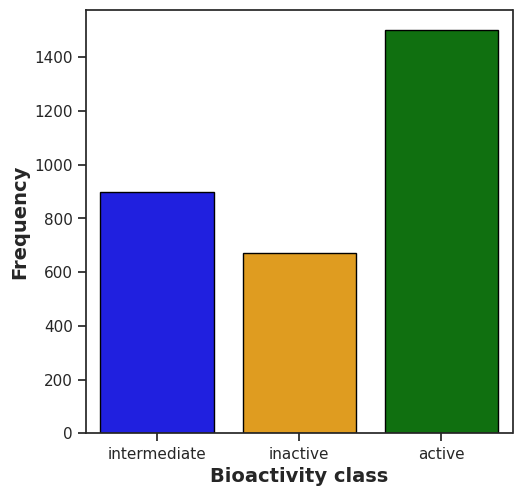

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_to_research, edgecolor='black', palette=['blue', 'orange', 'green'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/plot_bioactivity_class.pdf')

### 3.6.2. Persebaran senyawa lipofilik (logP) terhadap ukuran senyawa tertentu (MW) dengan berbagai class

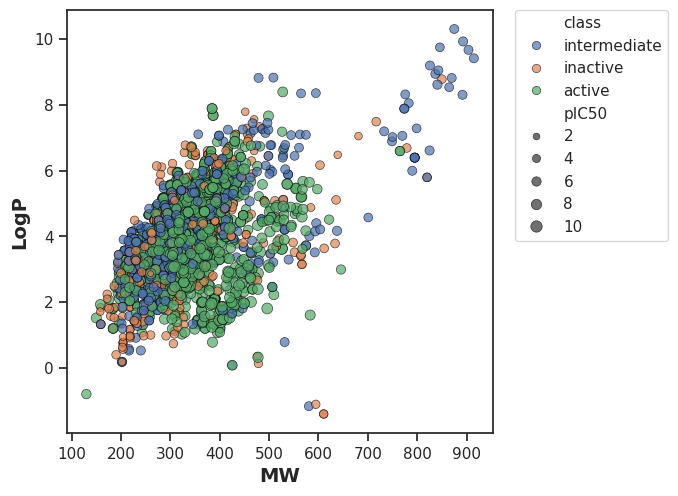

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_to_research, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/plot_MW_vs_LogP.pdf')

### 3.6.3. Persebaran pIC50 terhadap Bioactivity Class
pIC50 merupakan efektifitas suatu senyawa sebagai inhibitor target

<ipython-input-524-555ca2a8916d>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




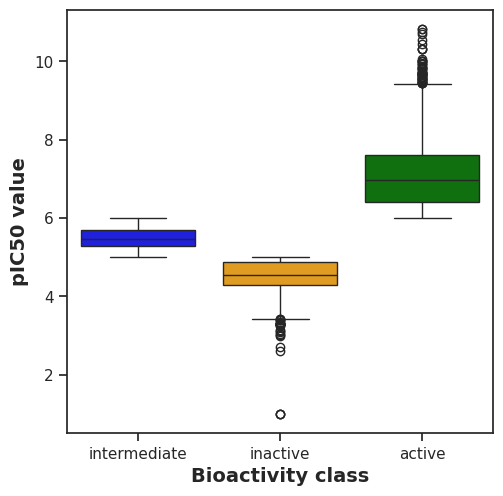

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_to_research, palette=['blue', 'orange', 'green'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/plot_ic50.pdf')

### 3.6.4. Persebaran MW terhadap Bioactivity Class
MW merupakan molekular size, digunakan untuk menentukan size yang sesuai untuk molekul melewati membran. MW memiliki satuan Da (Dalton) atau g/mol, pada Lipinski’s rule of five MW <= 500

<ipython-input-528-e34204895a63>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




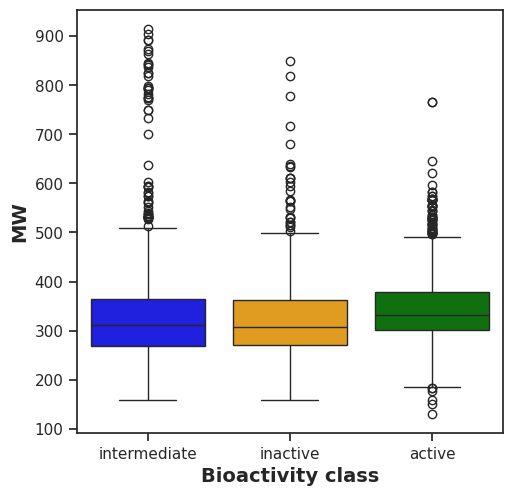

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_to_research, palette=['blue', 'orange', 'green'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/plot_MW.pdf')

### 3.6.5. Persebaran LogP terhadap Bioactivity Class
logP adalah nilai eksperimen atau prediksi dari koefisien partisi oktanol-air (PPP), yang dihitung sebagai logaritma dasar 10 dari rasio konsentrasi senyawa dalam fase oktanol (larut lemak) dan fase air.
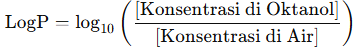

*   Positive : Molekul lebih lipofilik (lebih larut dalam lemak)
*   Negative : Molekul lebih hidrofilik (lebih larut dalam air).

Pada obat oral logP biasanya <= 5 (Lipinski’s rule of five) untuk mempermudah absorpsi pada saluran pencernaan.



<ipython-input-531-36bdced9484a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




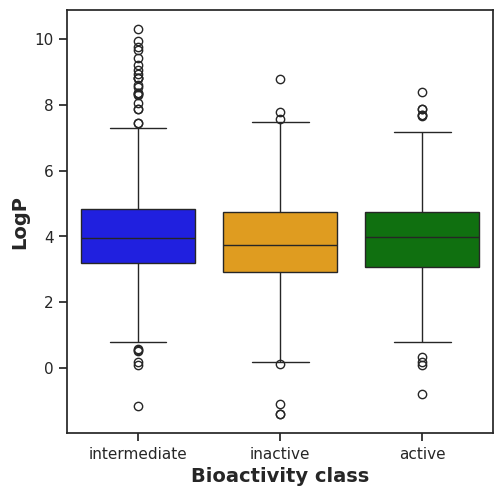

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_to_research, palette=['blue', 'orange', 'green'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/plot_LogP.pdf')

### 3.6.6. Persebaran NumHDonors terhadap Bioactivity Class
NumHDonors adalah banyaknya atom hidrogen yang berikatan dengan atom elektronegatif seperti oksigen atau nitrogen yang dapat membentuk ikatan hidrogen, NumHDonors menentukan kemampuan senyawa untuk berinteraksi dengan target, pada Lipinksi’s rule of five NumHDonors <= 5.

<ipython-input-534-58ac5371bcf8>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




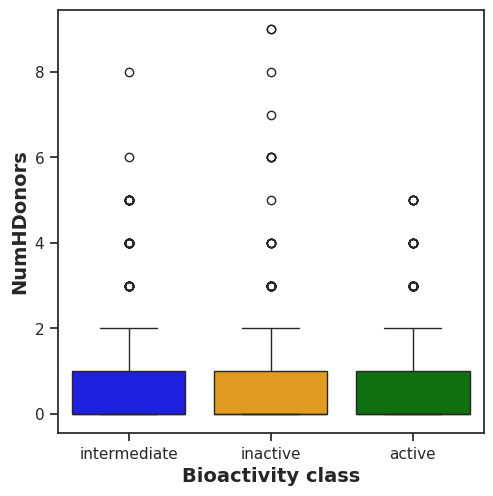

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_to_research, palette=['blue', 'orange', 'green'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/plot_NumHDonors.pdf')

### 3.6.7. Persebaran NumHAcceptors terhadap Bioactivity Class
NumHAcceptors adalah banyaknya elektronegatif atom yang dapat menerima ikatan hidrogen, digunakan untuk menentukan potensial binding dengan biological receprors. Pada Lipinski’s rule of five, NumHAcceptors <= 10. NumHAcceptors dan NumHDonors digunakan untuk mengukur kemampuan ikatan hidrogen pada senyawa dengan target.

<ipython-input-537-34d2b0160b80>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




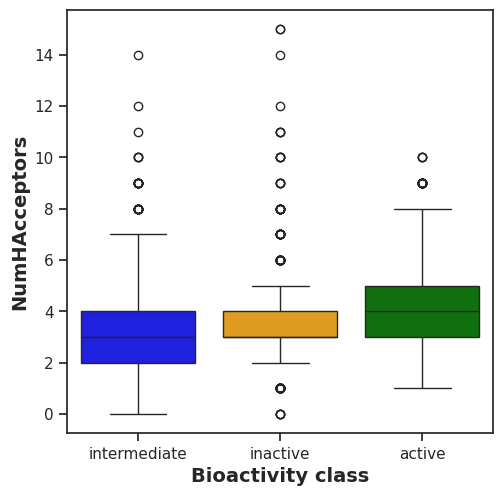

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_to_research, palette=['blue', 'orange','green'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/plot_NumHAcceptors.pdf')

## 3.7. Memilih Dataframe Dengan Bioaktivitas Aktive dan pIC50 > 6

In [ ]:
df_active_potential_compound = df_to_research[
    (df_to_research['class'] == "active") & (df_to_research['pIC50'] > 6) & (df_to_research['MW'] <= 500)
].reset_index(drop=True)

df_active_potential_compound

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
1,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
2,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
3,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.383,4.63450,0.0,3.0,7.387216
4,CHEMBL111868,Cn1cc(C(c2ccc(F)cc2)n2ccnc2)c2cc(Br)ccc21,active,384.252,4.91410,0.0,3.0,7.105130
...,...,...,...,...,...,...,...,...
1413,CHEMBL151207,CCCCOc1ccc(-n2cnc(C)c2)cc1,active,230.311,3.35962,0.0,3.0,6.443999
1414,CHEMBL5423575,CCCCOc1ccc(-n2ccnn2)cc1,active,217.272,2.44620,0.0,4.0,7.166980
1415,CHEMBL150278,CCCCOc1ccc(-c2nn[nH]n2)cc1,active,218.260,2.04560,1.0,4.0,6.499997
1416,CHEMBL151038,CCCCOc1ccc(-c2oncc2C)cc1,active,231.295,3.82892,0.0,3.0,6.319003


In [ ]:
df_active_potential_compound.to_csv('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/aromatase_active_potential_bioactivity.csv', index=False)

In [ ]:
import pandas as pd
df_active_potential_compound = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/aromatase_active_potential_bioactivity.csv')

# 4. Persiapan Data

## 4.1. Menyiapkan Padel Descriptor
Padel descriptor adalah metode dalam kimia komputasional yang digunakan untuk merepresentasikan molekul dalam bentuk angka atau vektor yang menggambarkan sifat-sifat struktural atau kimia dari molekul tersebut. Deskriptor ini digunakan untuk berbagai aplikasi, seperti prediksi aktivitas biologis molekul, klasifikasi senyawa, atau untuk mencari kesamaan antara molekul dalam database. Padel descriptor sering digunakan dalam analisis data untuk mempermudah proses perbandingan dan pemodelan molekul secara komputasional.

In [ ]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/PSD/tubes/padel.zip

Archive:  /content/drive/MyDrive/Colab Notebooks/PSD/tubes/padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  infl

In [ ]:
df_selection = df_active_potential_compound[['canonical_smiles','molecule_chembl_id']]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
!cat molecule.smi | head -10

CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21	CHEMBL431859
CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21	CHEMBL113637
Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21	CHEMBL112021
CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21	CHEMBL41761
Cn1cc(C(c2ccc(F)cc2)n2ccnc2)c2cc(Br)ccc21	CHEMBL111868
CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2cc(Br)ccc21	CHEMBL111888
CCn1ccc2cc(C(c3ccccc3)n3ccnc3)ccc21	CHEMBL112074
N#Cc1ccc(Cn2cc(Cn3ccnc3)c3ccccc32)cc1	CHEMBL324326
C[C@]12CCCC=C1[C@H](O)C[C@@H]1[C@@H]2CC[C@]2(C)C(=O)CC[C@@H]12	CHEMBL1630261
O=C1/C(=C\c2c[nH]cn2)CCc2ccccc21	CHEMBL169251


In [ ]:
!cat molecule.smi | wc -l

1418


## 4.2. Membuat Fingerprints Substructure Count
Dalam identifikasi struktur molekul, fingerprints yang sering digunakan untuk pengukuran korelasi adalah PubChem, Substructure Count dan MACCS, pada penelitian ini fingerprints yang akan digunakan adalah Substructure Count.

*   Substructure Count adalah deskriptor numerik yang menghitung jumlah substruktur tertentu dalam molekul, berdasarkan pola SMARTS (Simplified Molecular Input Line Entry System) sebanyak 308 bit

In [ ]:
!cat /content/drive/MyDrive/Colab\ Notebooks/PSD/tubes/padel_SubstructureCount.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/SubstructureFingerprintCount.xml -dir ./ -file descriptors_output_SubstructureCount.csv


In [ ]:
!bash /content/drive/MyDrive/Colab\ Notebooks/PSD/tubes/padel_SubstructureCount.sh

Processing CHEMBL431859 in molecule.smi (1/1418). 
Processing CHEMBL113637 in molecule.smi (2/1418). 
Processing CHEMBL41761 in molecule.smi (4/1418). Average speed: 4.83 s/mol.
Processing CHEMBL112021 in molecule.smi (3/1418). 
Processing CHEMBL111868 in molecule.smi (5/1418). Average speed: 1.77 s/mol.
Processing CHEMBL111888 in molecule.smi (6/1418). Average speed: 1.33 s/mol.
Processing CHEMBL112074 in molecule.smi (7/1418). Average speed: 1.42 s/mol.
Processing CHEMBL324326 in molecule.smi (8/1418). Average speed: 0.98 s/mol.
Processing CHEMBL1630261 in molecule.smi (9/1418). Average speed: 0.87 s/mol.
Processing CHEMBL169251 in molecule.smi (10/1418). Average speed: 0.78 s/mol.
Processing CHEMBL1629805 in molecule.smi (11/1418). Average speed: 0.72 s/mol.
Processing CHEMBL304903 in molecule.smi (12/1418). Average speed: 0.65 s/mol.
Processing CHEMBL168434 in molecule.smi (13/1418). Average speed: 0.61 s/mol.
Processing CHEMBL352645 in molecule.smi (14/1418). Average speed: 0.57 s

In [ ]:
df_fingerprints_subcount = pd.read_csv('descriptors_output_SubstructureCount.csv')
df_fingerprints_subcount

,Name,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC6,SubFPC7,SubFPC8,SubFPC9,...,SubFPC298,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC304,SubFPC305,SubFPC306,SubFPC307
0,CHEMBL113637,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,5.0,4.0,0.0,0.0,0.0,0.0,20.0
1,CHEMBL431859,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,6.0,4.0,0.0,0.0,0.0,0.0,20.0
2,CHEMBL41761,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,5.0,4.0,0.0,0.0,0.0,0.0,20.0
3,CHEMBL112021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,19.0
4,CHEMBL111888,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,5.0,4.0,0.0,0.0,0.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,CHEMBL151207,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,5.0,4.0,0.0,0.0,0.0,0.0,10.0
1414,CHEMBL5423575,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,9.0
1415,CHEMBL150278,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,6.0,4.0,0.0,0.0,0.0,0.0,8.0
1416,CHEMBL151038,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,5.0,4.0,0.0,0.0,0.0,0.0,9.0


In [ ]:
df_fingerprints_subcount.to_csv('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/descriptors_output_SubstructureCount_psd.csv', index=False)

## 4.3. Membersihkan Dataframe Fingerprins

In [ ]:
import pandas as pd
df_fingerprints_subcount = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/descriptors_output_SubstructureCount_psd.csv')

In [ ]:
zero_percentage_subcount = (df_fingerprints_subcount == 0).sum() / len(df_fingerprints_subcount) * 100
print(zero_percentage_subcount)

Name           0.000000
SubFPC1       57.827927
SubFPC2       44.217207
SubFPC3       65.796897
SubFPC4       71.861777
                ...    
SubFPC303     80.394922
SubFPC304    100.000000
SubFPC305    100.000000
SubFPC306    100.000000
SubFPC307      0.000000
Length: 308, dtype: float64


In [ ]:
df_fingerprints_subcount = df_fingerprints_subcount.loc[:, (df_fingerprints_subcount != 0).any(axis=0)]
df_fingerprints_subcount

,Name,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC6,SubFPC8,SubFPC9,SubFPC10,...,SubFPC295,SubFPC296,SubFPC297,SubFPC298,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC307
0,CHEMBL113637,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,20.0
1,CHEMBL431859,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,6.0,6.0,4.0,0.0,20.0
2,CHEMBL41761,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,20.0
3,CHEMBL112021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,0.0,19.0
4,CHEMBL111888,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,CHEMBL151207,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,10.0
1414,CHEMBL5423575,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,0.0,9.0
1415,CHEMBL150278,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,6.0,6.0,4.0,0.0,8.0
1416,CHEMBL151038,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,9.0


# 5. Clustering Berdasarkan fingerprints Structure Count

In [ ]:
df_fingerprints_subcount = df_fingerprints_subcount.drop(columns=['Name'])
df_fingerprints_subcount

,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC6,SubFPC8,SubFPC9,SubFPC10,SubFPC12,...,SubFPC295,SubFPC296,SubFPC297,SubFPC298,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC307
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,20.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,6.0,6.0,4.0,0.0,20.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,20.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,0.0,19.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,10.0
1414,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,0.0,9.0
1415,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,6.0,6.0,4.0,0.0,8.0
1416,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,9.0


## 5.1. Cluster Menggunakan K-Means
### a. Mencari Nilai K Cluster Dataset Fingerprints Substructure Count

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_subcount_reduced = pca.fit_transform(df_fingerprints_subcount)

In [ ]:
df_subcount_reduced

array([[-10.49682822,   3.49118296],
       [ -9.36681179,   4.24171513],
       [-10.49682822,   3.49118296],
       ...,
       [ -1.42683815,  -8.32483504],
       [ -2.22648006,  -8.38899951],
       [-10.829862  ,  -4.18107058]])

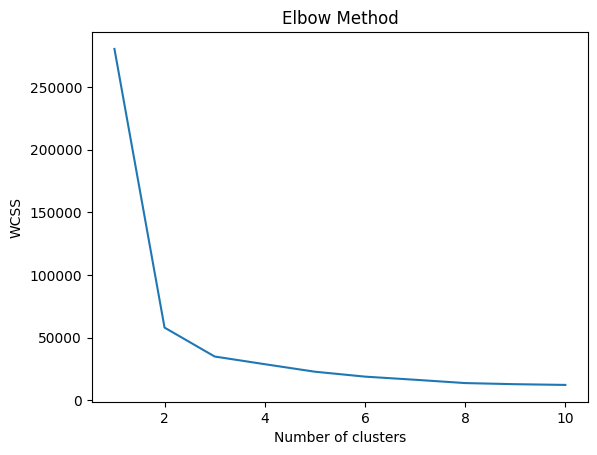

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df_subcount_reduced)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/plot_k_elbow.pdf')

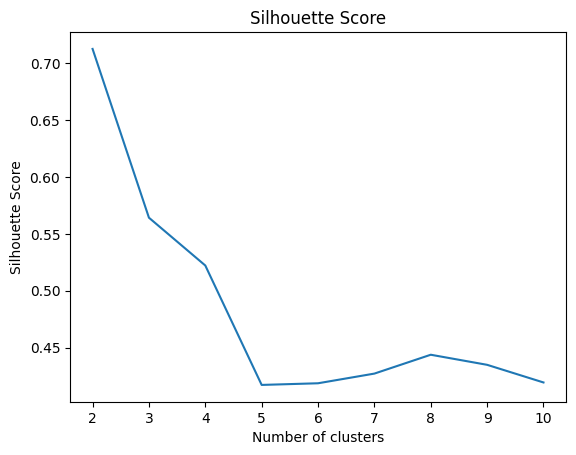

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  labels = kmeans.fit_predict(df_subcount_reduced)
  silhouette_scores.append(silhouette_score(df_subcount_reduced, labels))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/plot_k_silhouette.pdf')

### b. Cluster Fingerprints Substructure Count

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42).fit(df_subcount_reduced)
kmeans

KMeans(n_clusters=2, random_state=42)

In [ ]:
df_fingerprints_subcount['cluster_kmeans'] = kmeans.labels_
df_fingerprints_subcount['cluster_kmeans'].value_counts()

,count
cluster_kmeans,
0,1034
1,384


In [ ]:
import plotly.express as px

fig = px.scatter(x=df_subcount_reduced[:, 0], y=df_subcount_reduced[:, 1], color=df_fingerprints_subcount['cluster_kmeans'])

fig.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/plot_kmeans.pdf')

<Figure size 640x480 with 0 Axes>

## 5.2. Cluster Menggunakan DBSCAN
### a. Mencari Perkiraan Epsilon Dengan K-Distance Plot

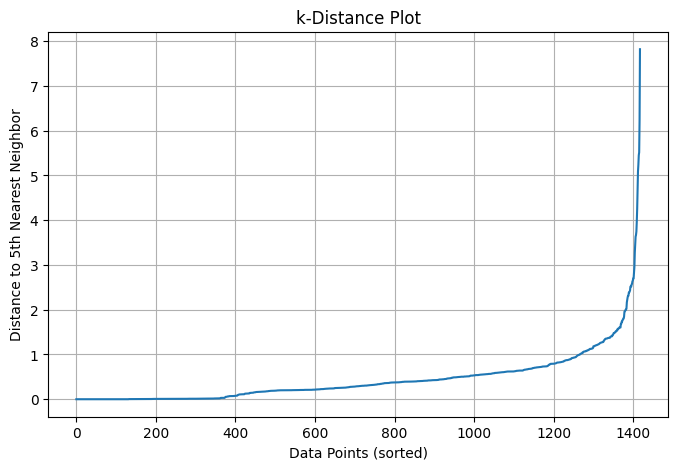

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_subcount_reduced)
distances, indices = neighbors_fit.kneighbors(df_subcount_reduced)
distances = np.sort(distances, axis=0)
distances = distances[:, 3]

plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('k-Distance Plot')
plt.xlabel('Data Points (sorted)')
plt.ylabel(f'Distance to {min_samples}th Nearest Neighbor')
plt.grid(True)
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/epsilon_k_distance_plot.pdf')

### b. Cluster Substructure Count

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=5).fit(df_subcount_reduced)
dbscan

DBSCAN(eps=2)

In [ ]:
df_fingerprints_subcount['cluster_dbscan'] = dbscan.labels_
df_fingerprints_subcount['cluster_dbscan'].value_counts()

,count
cluster_dbscan,
0,1049
1,253
2,76
-1,27
3,13


In [ ]:
import plotly.express as px

fig = px.scatter(x=df_subcount_reduced[:, 0], y=df_subcount_reduced[:, 1], color=df_fingerprints_subcount['cluster_dbscan'])

fig.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/eps_2.pdf')

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import silhouette_score as ss

ss(df_subcount_reduced, df_fingerprints_subcount['cluster_dbscan'])

0.5653685005652404

### c. Mencari Epsilon dan Min Samples Optimal

In [ ]:
epsilons = np.linspace(0.8, 2.7, num=50)
epsilons

array([0.8       , 0.83877551, 0.87755102, 0.91632653, 0.95510204,
       0.99387755, 1.03265306, 1.07142857, 1.11020408, 1.14897959,
       1.1877551 , 1.22653061, 1.26530612, 1.30408163, 1.34285714,
       1.38163265, 1.42040816, 1.45918367, 1.49795918, 1.53673469,
       1.5755102 , 1.61428571, 1.65306122, 1.69183673, 1.73061224,
       1.76938776, 1.80816327, 1.84693878, 1.88571429, 1.9244898 ,
       1.96326531, 2.00204082, 2.04081633, 2.07959184, 2.11836735,
       2.15714286, 2.19591837, 2.23469388, 2.27346939, 2.3122449 ,
       2.35102041, 2.38979592, 2.42857143, 2.46734694, 2.50612245,
       2.54489796, 2.58367347, 2.62244898, 2.66122449, 2.7       ])

In [ ]:
min_samples = np.arange(2, 20, step=3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [ ]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(0.8, 2),
 (0.8, 5),
 (0.8, 8),
 (0.8, 11),
 (0.8, 14),
 (0.8, 17),
 (0.8387755102040817, 2),
 (0.8387755102040817, 5),
 (0.8387755102040817, 8),
 (0.8387755102040817, 11),
 (0.8387755102040817, 14),
 (0.8387755102040817, 17),
 (0.8775510204081634, 2),
 (0.8775510204081634, 5),
 (0.8775510204081634, 8),
 (0.8775510204081634, 11),
 (0.8775510204081634, 14),
 (0.8775510204081634, 17),
 (0.916326530612245, 2),
 (0.916326530612245, 5),
 (0.916326530612245, 8),
 (0.916326530612245, 11),
 (0.916326530612245, 14),
 (0.916326530612245, 17),
 (0.9551020408163265, 2),
 (0.9551020408163265, 5),
 (0.9551020408163265, 8),
 (0.9551020408163265, 11),
 (0.9551020408163265, 14),
 (0.9551020408163265, 17),
 (0.9938775510204082, 2),
 (0.9938775510204082, 5),
 (0.9938775510204082, 8),
 (0.9938775510204082, 11),
 (0.9938775510204082, 14),
 (0.9938775510204082, 17),
 (1.0326530612244897, 2),
 (1.0326530612244897, 5),
 (1.0326530612244897, 8),
 (1.0326530612244897, 11),
 (1.0326530612244897, 14),
 (1.032653

In [ ]:
N = len(combinations)
N

300

In [ ]:
def get_scores_and_labels(combinations, df_subcount_reduced):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(df_subcount_reduced)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1

    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue

    scores.append(ss(df_subcount_reduced, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1],
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, df_subcount_reduced)

Combination (0.8, 2) on iteration 1 of 300 has 86 clusters. Moving on
Index: 1, Score: -0.15379882421090382, Labels: [ 0  0  0 ... -1 -1 21], NumClusters: 30
Index: 2, Score: -0.21509829563392602, Labels: [ 0  0  0 ... -1 -1 15], NumClusters: 23
Index: 3, Score: -0.21654491743845078, Labels: [ 0  0  0 ... -1 -1 10], NumClusters: 14
Index: 4, Score: -0.26541787210416357, Labels: [ 0  0  0 ... -1 -1 -1], NumClusters: 10
Index: 5, Score: -0.049691674609541, Labels: [ 0  0  0 ... -1 -1 -1], NumClusters: 5
Combination (0.8387755102040817, 2) on iteration 7 of 300 has 77 clusters. Moving on
Index: 7, Score: -0.1439251338032345, Labels: [ 0  0  0 ... -1 -1 20], NumClusters: 28
Index: 8, Score: -0.13102090770744662, Labels: [ 0  0  0 ... -1 -1 13], NumClusters: 19
Index: 9, Score: -0.17300371957246402, Labels: [ 0  0  0 ... -1 -1 10], NumClusters: 17
Index: 10, Score: -0.2503152699445313, Labels: [ 0  0  0 ... -1 -1 -1], NumClusters: 9
Index: 11, Score: -0.050379306009900385, Labels: [ 0  0  0

In [ ]:
best_dict

{'best_epsilon': 2.5836734693877554,
 'best_min_samples': 8,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0]),
 'best_score': 0.6174040873192694}

### d. Menggunakan Cluster dengan epsilon dan min_samples Optimal

In [ ]:
df_fingerprints_subcount['cluster_dbscan'] = best_dict['best_labels']

df_fingerprints_subcount['cluster_dbscan'].value_counts()

,count
cluster_dbscan,
0,1055
1,345
-1,18


In [ ]:
fig = px.scatter(x=df_subcount_reduced[:, 0], y=df_subcount_reduced[:, 1], color=df_fingerprints_subcount['cluster_dbscan'])
fig.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/eps_2.5.pdf')

<Figure size 640x480 with 0 Axes>

# 6. Proses Analisis
## 6.1. Analisis Fitur Substructur Count pada Tiap Cluster

In [ ]:
df_active_potential_compound.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  1418 non-null   object 
 1   canonical_smiles    1418 non-null   object 
 2   class               1418 non-null   object 
 3   MW                  1418 non-null   float64
 4   LogP                1418 non-null   float64
 5   NumHDonors          1418 non-null   float64
 6   NumHAcceptors       1418 non-null   float64
 7   pIC50               1418 non-null   float64
dtypes: float64(5), object(3)
memory usage: 88.8+ KB


In [ ]:
df_final_subcount = pd.concat([df_active_potential_compound['molecule_chembl_id'], df_fingerprints_subcount], axis=1)
df_final_subcount = df_final_subcount.drop(columns=['cluster_kmeans'])
df_final_subcount

,molecule_chembl_id,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC6,SubFPC8,SubFPC9,SubFPC10,...,SubFPC296,SubFPC297,SubFPC298,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC307,cluster_dbscan
0,CHEMBL431859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,20.0,0
1,CHEMBL113637,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,6.0,4.0,0.0,20.0,0
2,CHEMBL112021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,20.0,0
3,CHEMBL41761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,4.0,4.0,0.0,19.0,0
4,CHEMBL111868,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,20.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,CHEMBL151207,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,10.0,0
1414,CHEMBL5423575,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,4.0,4.0,0.0,9.0,0
1415,CHEMBL150278,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,6.0,4.0,0.0,8.0,0
1416,CHEMBL151038,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,9.0,0


In [ ]:
df_final_subcount.to_csv('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/final_subcount.csv', index=False)

In [ ]:
import pandas as pd
df_final_subcount = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/final_subcount.csv')
df_final_subcount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 97 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  1418 non-null   object 
 1   SubFPC1             1418 non-null   float64
 2   SubFPC2             1418 non-null   float64
 3   SubFPC3             1418 non-null   float64
 4   SubFPC4             1418 non-null   float64
 5   SubFPC5             1418 non-null   float64
 6   SubFPC6             1418 non-null   float64
 7   SubFPC8             1418 non-null   float64
 8   SubFPC9             1418 non-null   float64
 9   SubFPC10            1418 non-null   float64
 10  SubFPC12            1418 non-null   float64
 11  SubFPC13            1418 non-null   float64
 12  SubFPC14            1418 non-null   float64
 13  SubFPC15            1418 non-null   float64
 14  SubFPC16            1418 non-null   float64
 15  SubFPC17            1418 non-null   float64
 16  SubFPC

In [ ]:
for i in range(2):
    globals()[f'df_final_subcount{i+1}'] = df_final_subcount[df_final_subcount['cluster_dbscan'] == i]
    globals()[f'df_final_subcount{i+1}'] = globals()[f'df_final_subcount{i+1}'].drop(columns=['cluster_dbscan'])

    globals()[f'df_final_subcount{i+1}'] = globals()[f'df_final_subcount{i+1}'].loc[:, (globals()[f'df_final_subcount{i+1}'] != 0).any(axis=0)]
    globals()[f'df_final_subcount{i+1}'] = globals()[f'df_final_subcount{i+1}'].reset_index(drop=True)

    globals()[f'df_final_subcount{i+1}'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 89 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  1055 non-null   object 
 1   SubFPC1             1055 non-null   float64
 2   SubFPC2             1055 non-null   float64
 3   SubFPC3             1055 non-null   float64
 4   SubFPC4             1055 non-null   float64
 5   SubFPC5             1055 non-null   float64
 6   SubFPC6             1055 non-null   float64
 7   SubFPC8             1055 non-null   float64
 8   SubFPC9             1055 non-null   float64
 9   SubFPC12            1055 non-null   float64
 10  SubFPC13            1055 non-null   float64
 11  SubFPC14            1055 non-null   float64
 12  SubFPC15            1055 non-null   float64
 13  SubFPC16            1055 non-null   float64
 14  SubFPC17            1055 non-null   float64
 15  SubFPC18            1055 non-null   float64
 16  SubFPC

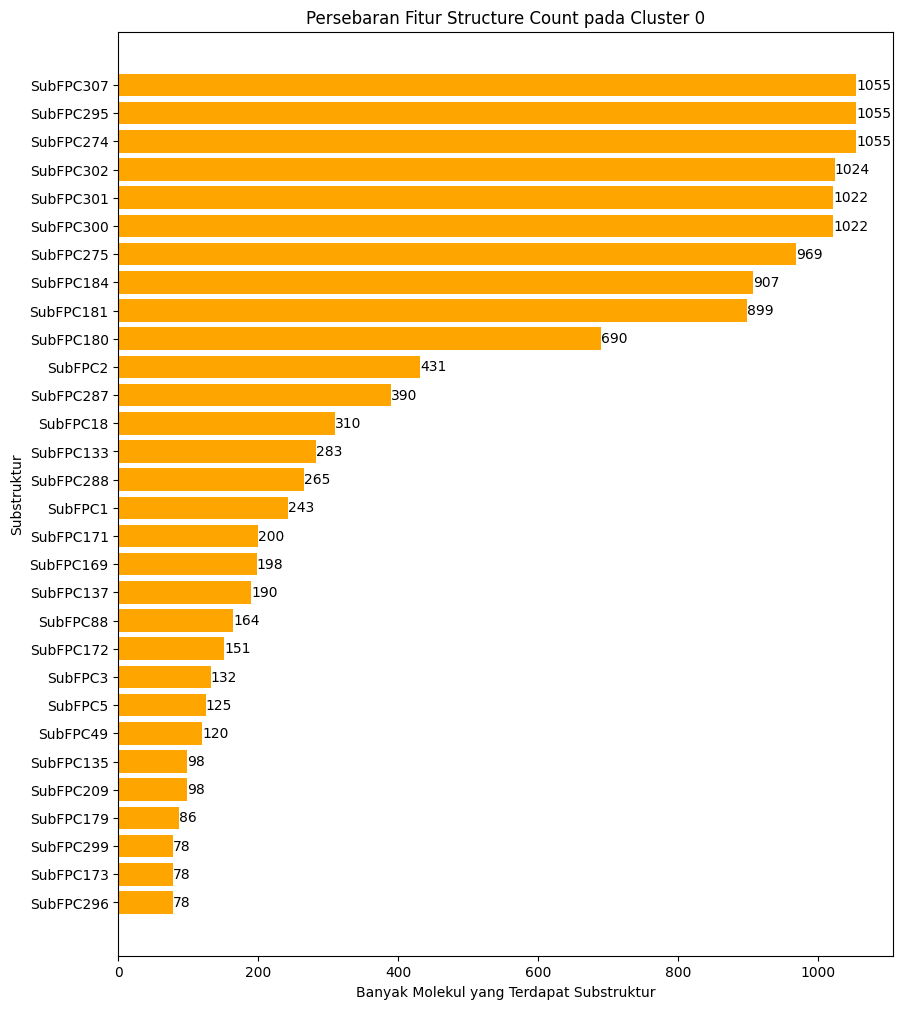

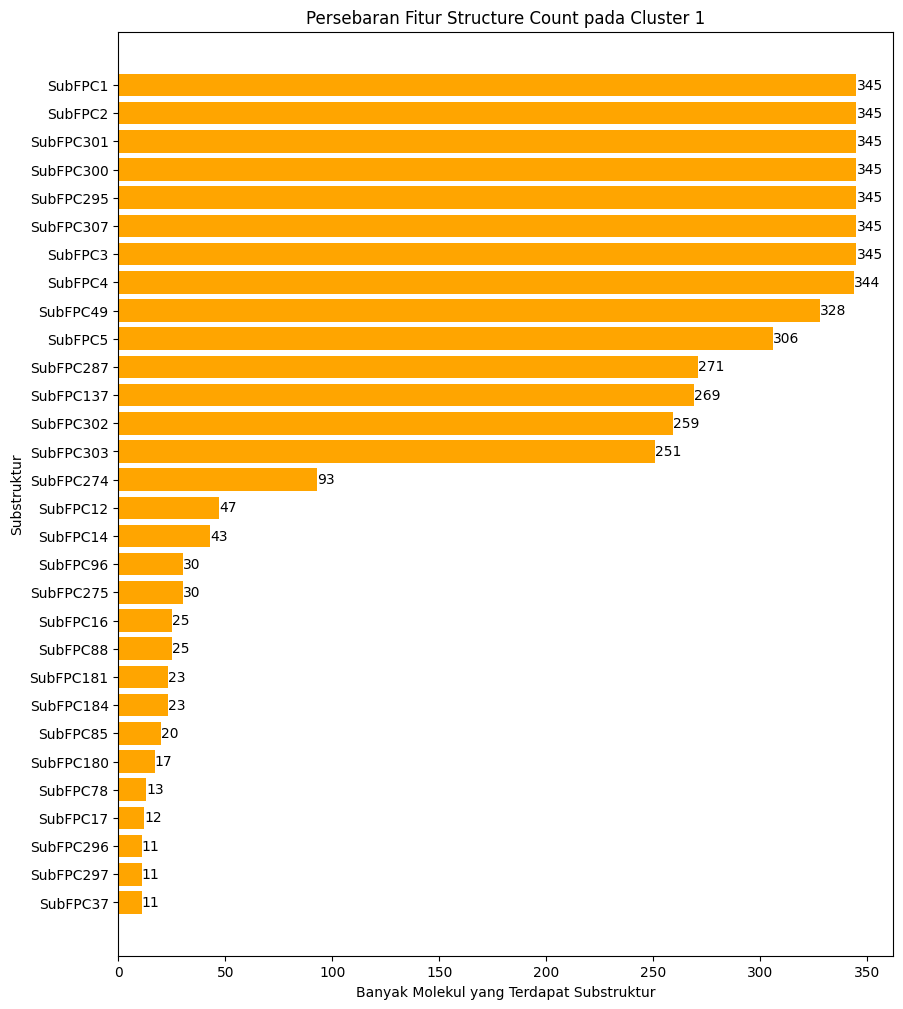

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(2):
    df_name = f'df_final_subcount{i+1}'
    df_subcount_count = globals()[df_name]
    df_subcount_count = df_subcount_count.drop(columns='molecule_chembl_id')

    subcount_count = (df_subcount_count != 0).sum()
    subcount_count_sorted = subcount_count.sort_values(ascending=False).head(30)
    subcount_count_sorted.to_csv(
        f'/content/drive/MyDrive/Colab Notebooks/PSD/tubes/subcount_count_sorted{i+1}.txt',
        sep='\t',
        header=True
    )

    plt.figure(figsize=(10, 12))
    bars = plt.barh(subcount_count_sorted.index, subcount_count_sorted.values, color='orange')
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', ha='left', color='black')
    plt.xlabel('Banyak Molekul yang Terdapat Substruktur')
    plt.ylabel('Substruktur')
    plt.title(f'Persebaran Fitur Structure Count pada Cluster {i}')
    plt.gca().invert_yaxis()
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/PSD/tubes/persebaran_subcount_bar{i+1}.pdf')
    plt.show()

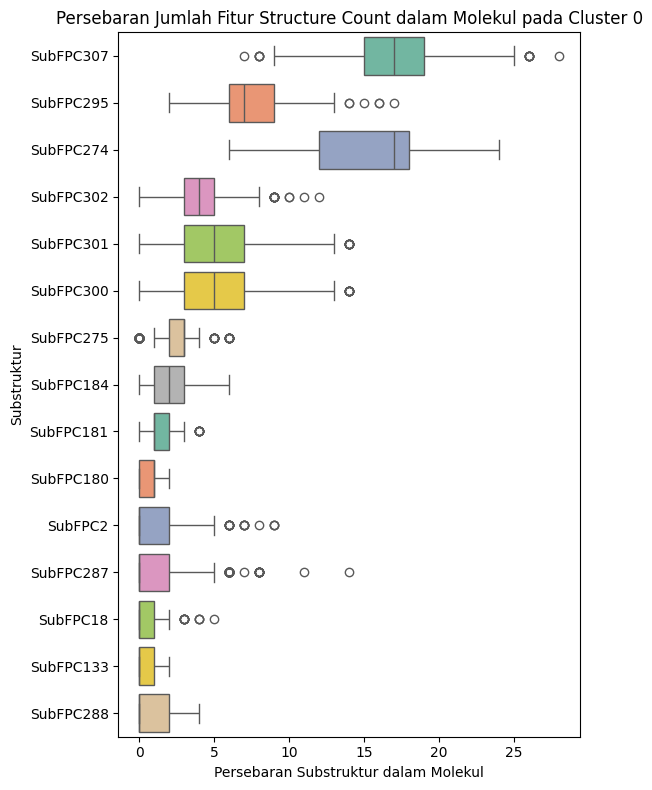

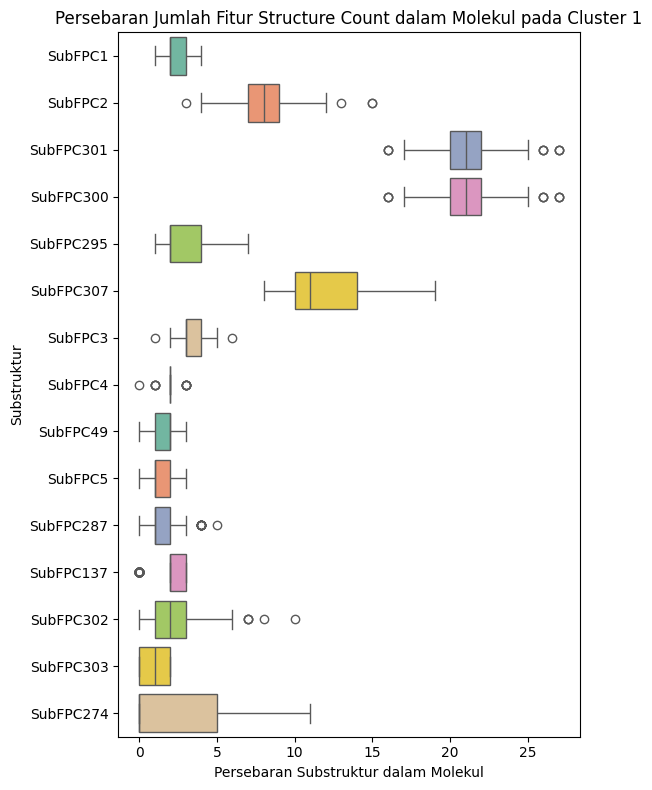

In [ ]:
for i in range(2):
    df_name = f'df_final_subcount{i+1}'
    df_subcount_count = globals()[df_name]
    df_subcount_count = df_subcount_count.drop(columns='molecule_chembl_id')

    subcount_count = (df_subcount_count != 0).sum()
    subcount_count_sorted = subcount_count.sort_values(ascending=False).head(15)

    features = subcount_count_sorted.index

    plt.figure(figsize=(6, 8))
    sns.boxplot(data=df_subcount_count[features], orient="h", palette="Set2")
    plt.xlabel('Persebaran Substruktur dalam Molekul')
    plt.ylabel('Substruktur')
    plt.title(f'Persebaran Jumlah Fitur Structure Count dalam Molekul pada Cluster {i}')
    plt.tight_layout()
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/PSD/tubes/persebaran_subcount_boxplot{i+1}.pdf')
    plt.show()

## 6.2. Analisis Fitur lainnya

In [ ]:
df_final_active_potential_compound = pd.concat([df_active_potential_compound, df_fingerprints_subcount['cluster_dbscan']], axis=1)
df_final_active_potential_compound = df_final_active_potential_compound.drop(df_final_active_potential_compound[df_final_active_potential_compound['cluster_dbscan'] == -1].index)
df_final_active_potential_compound

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50,cluster_dbscan
0,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423,0
1,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125,0
2,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606,0
3,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.383,4.63450,0.0,3.0,7.387216,0
4,CHEMBL111868,Cn1cc(C(c2ccc(F)cc2)n2ccnc2)c2cc(Br)ccc21,active,384.252,4.91410,0.0,3.0,7.105130,0
...,...,...,...,...,...,...,...,...,...
1413,CHEMBL151207,CCCCOc1ccc(-n2cnc(C)c2)cc1,active,230.311,3.35962,0.0,3.0,6.443999,0
1414,CHEMBL5423575,CCCCOc1ccc(-n2ccnn2)cc1,active,217.272,2.44620,0.0,4.0,7.166980,0
1415,CHEMBL150278,CCCCOc1ccc(-c2nn[nH]n2)cc1,active,218.260,2.04560,1.0,4.0,6.499997,0
1416,CHEMBL151038,CCCCOc1ccc(-c2oncc2C)cc1,active,231.295,3.82892,0.0,3.0,6.319003,0


In [ ]:
df_final_active_potential_compound.to_csv('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/final_active_potential_compound_with_cluster.csv', index=False)

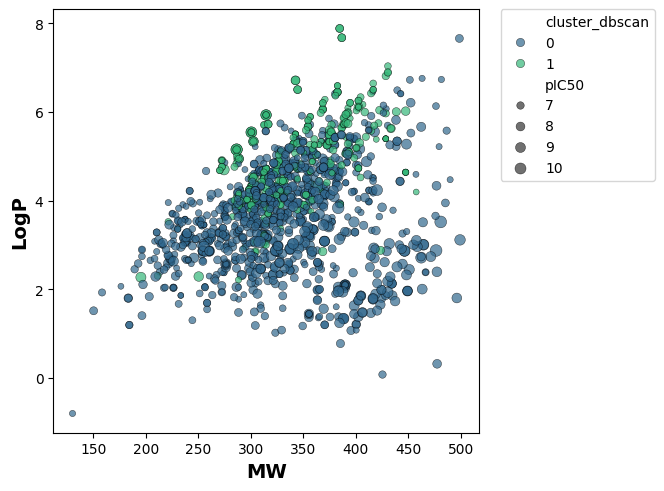

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final_active_potential_compound,
                hue='cluster_dbscan', size='pIC50', edgecolor='black',
                alpha=0.7, palette='viridis')

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/plot_MW_LogP_afterCluster.pdf')

<ipython-input-87-e9c7bbd1b22a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-87-e9c7bbd1b22a>:3: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



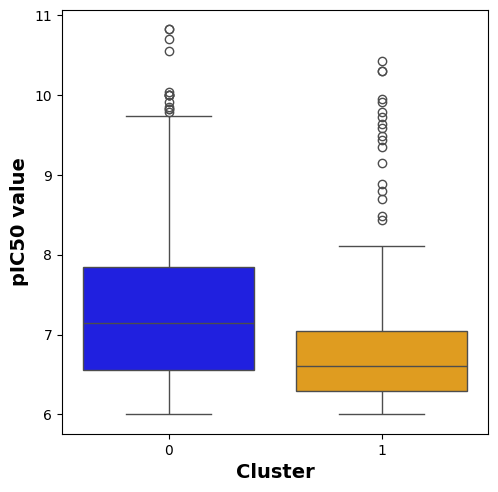

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'cluster_dbscan', y = 'pIC50', data = df_final_active_potential_compound, palette=['blue', 'orange', 'green', 'purple', 'yellow'])

plt.xlabel('Cluster', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/plot_pIC50_afterCluster.pdf')

<ipython-input-88-7e0615f32521>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-88-7e0615f32521>:3: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



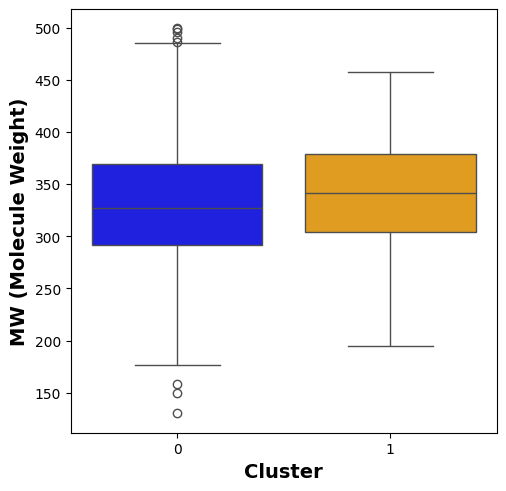

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'cluster_dbscan', y = 'MW', data = df_final_active_potential_compound, palette=['blue', 'orange', 'green', 'purple', 'yellow'])

plt.xlabel('Cluster', fontsize=14, fontweight='bold')
plt.ylabel('MW (Molecule Weight)', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/plot_MW_afterCluster.pdf')

<ipython-input-89-f49982f40952>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-89-f49982f40952>:3: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



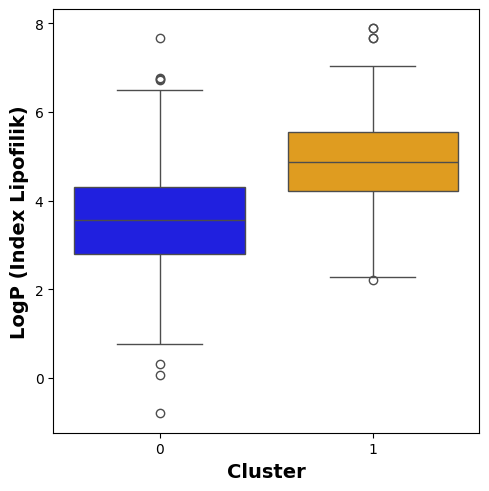

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'cluster_dbscan', y = 'LogP', data = df_final_active_potential_compound, palette=['blue', 'orange', 'green', 'purple', 'yellow'])

plt.xlabel('Cluster', fontsize=14, fontweight='bold')
plt.ylabel('LogP (Index Lipofilik)', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/plot_LogP_afterCluster.pdf')

<ipython-input-90-b4696526c4db>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-90-b4696526c4db>:3: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



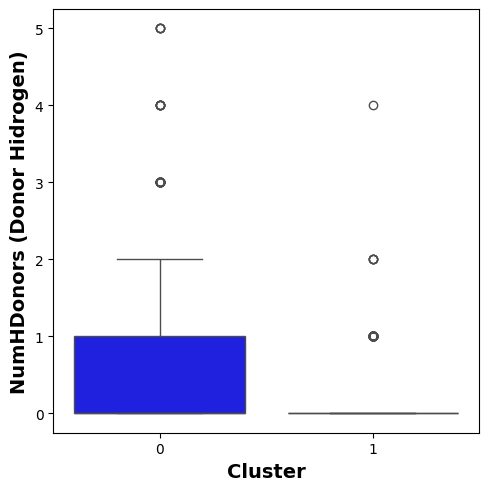

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'cluster_dbscan', y = 'NumHDonors', data = df_final_active_potential_compound, palette=['blue', 'orange', 'green', 'purple', 'yellow'])

plt.xlabel('Cluster', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors (Donor Hidrogen)', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/plot_NumHDonors_afterCluster.pdf')

<ipython-input-91-4b9e8a4ebd78>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-91-4b9e8a4ebd78>:3: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



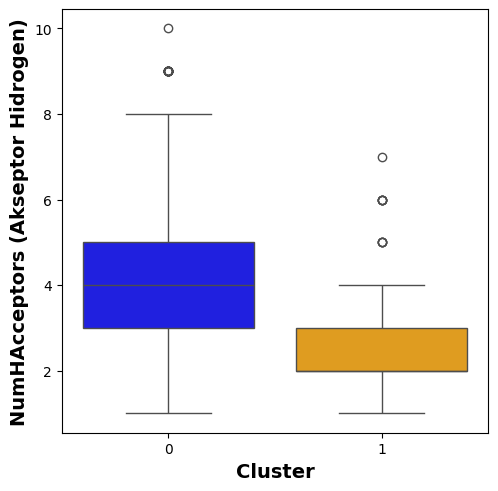

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'cluster_dbscan', y = 'NumHAcceptors', data = df_final_active_potential_compound, palette=['blue', 'orange', 'green', 'purple', 'yellow'])

plt.xlabel('Cluster', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors (Akseptor Hidrogen)', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/plot_NumHAcceptors_afterCluster.pdf')